# IMCOMPLETED... 
todo: Nose landmark has to be guestimated

In [15]:
import os
import sys
sys.path.append('../')

from scipy.io import loadmat
import cv2
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [48]:
def parse_pts_file(data):
    dt = data.split('\n')[3:-2]
    landmarks = [[float(y) for y in x.split(' ')] for x in dt]
    return landmarks

def keep_required_landmarks(landmarks):
    idx_to_keep = [7, 8, 9, # jaw
               27, 28, 29, 30, 31, 32, 33, 34, 35, # nose
               36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47] # eyes
    
    temp = []
    for idx in idx_to_keep:
        temp.append(landmarks[idx])
    return temp

def get_face_roi(landmarks):
    mean_avg_top_diff_ratio = 0.2963
    mean_avg_bottom_diff_ratio = 0.041

    min_xy = np.min(landmarks, axis=0)
    max_xy = np.max(landmarks, axis=0)
    
    # expand to forehead
    new_min_xy = np.array([
        min_xy[0],
        min_xy[1] - (max_xy[1] - min_xy[1]) * mean_avg_top_diff_ratio
    ])
    new_max_xy = np.array([
        max_xy[0],
        max_xy[1] + (max_xy[1] - min_xy[1]) * mean_avg_bottom_diff_ratio
    ])
    
    face_length = max(new_max_xy - new_min_xy)
    center_xy = (new_min_xy + new_max_xy) / 2

    new_min_xy = center_xy - face_length / 2
    new_max_xy = center_xy + face_length / 2
        
    return new_min_xy, new_max_xy

def crop_img(img, minx, miny, maxx, maxy):
    return img[int(miny):int(maxy), int(minx):int(maxx)]

In [6]:
data_path = '../../../data-archive/facial_landmarks/MultiPIE-3D/'

In [7]:
all_pts = os.listdir(data_path + '/landmark_pts')

70


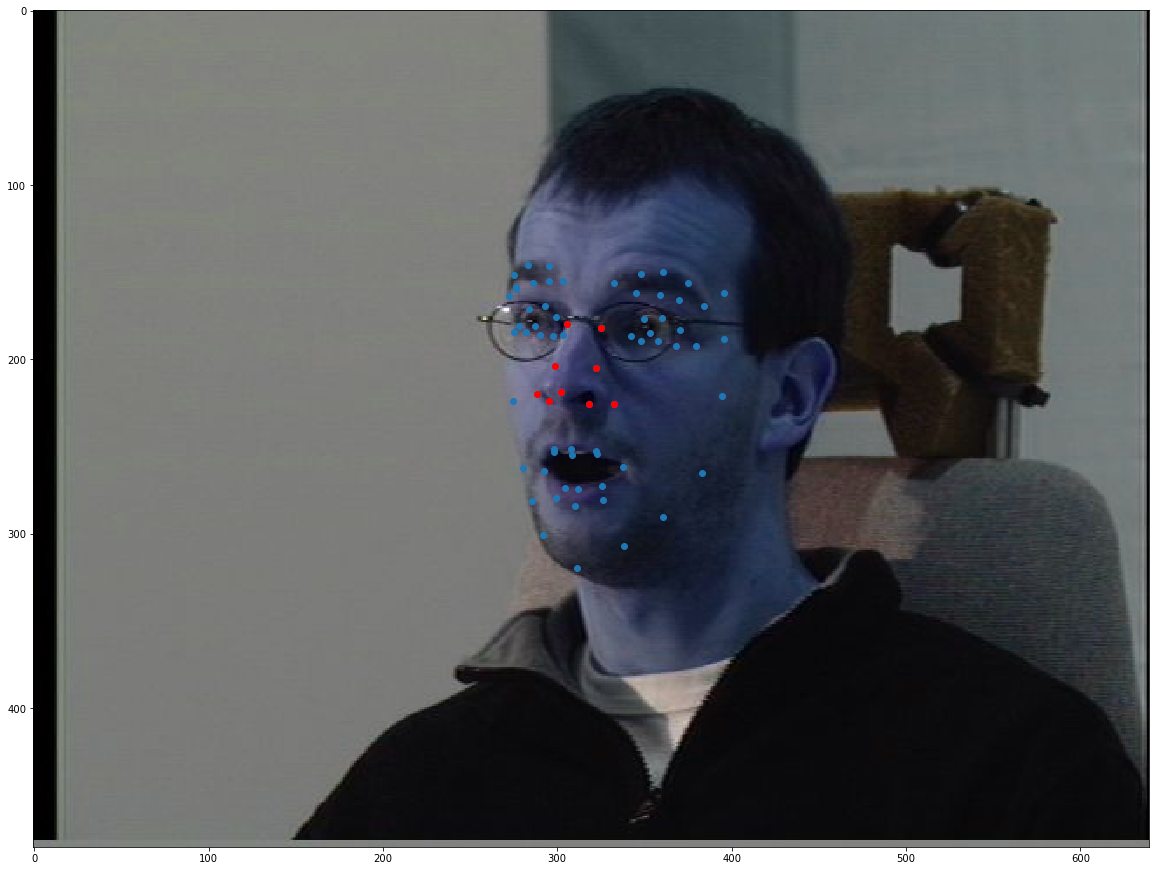

In [131]:
sample_path = np.random.choice(all_pts)

pts_path = os.path.join(data_path, 'landmark_pts', sample_path)
img_path = os.path.join(data_path, 'image_jpg', sample_path.replace('.pts', '.jpg'))

with open(pts_path, 'r') as file:
    data = file.read()
    file.close()

img = cv2.imread(img_path)
raw_landmark = parse_pts_file(data)
# raw_landmark = raw_landmark[2:]
h, w, c = img.shape        
# temp = np.multiply(raw_landmark, [h, w])
# landmarks = keep_required_landmarks(raw_landmark[2:])

minxy, maxxy = get_face_roi(raw_landmark)
bbox = minxy[0], minxy[1], maxxy[0], maxxy[1]

face = crop_img(img, bbox[0], bbox[1], bbox[2], bbox[3])

x, y = np.transpose(raw_landmark)

print(len(raw_landmark))

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.scatter(x, y)

nose = get_nose(raw_landmark)
x, y = np.transpose(nose)
plt.scatter(x,y, c='r')

In [114]:
len(raw_landmark)

70

left_eye = [27:35]
right_eye = [19:28]
jaw = [62:65]


nose needs to be calculated...
nose_shape = [35:43]
nose_tip = [2]

In [99]:
def get_nose(landmarks):
    return landmarks[35:43] + [landmarks[2]]

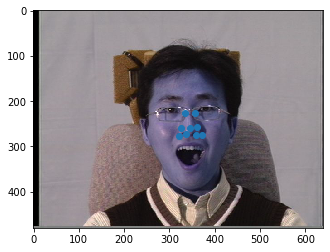

In [102]:
plt.imshow(img)
nose = get_nose(raw_landmark)
x, y = np.transpose(nose)
plt.scatter(x,y)

In [82]:
raw_landmark[23:31]

[[296.534, 216.684],
 [295.683, 225.201],
 [312.718, 216.684],
 [311.014, 226.053],
 [364.422, 223.805],
 [398.516, 220.396],
 [381.469, 211.872],
 [383.174, 224.658]]

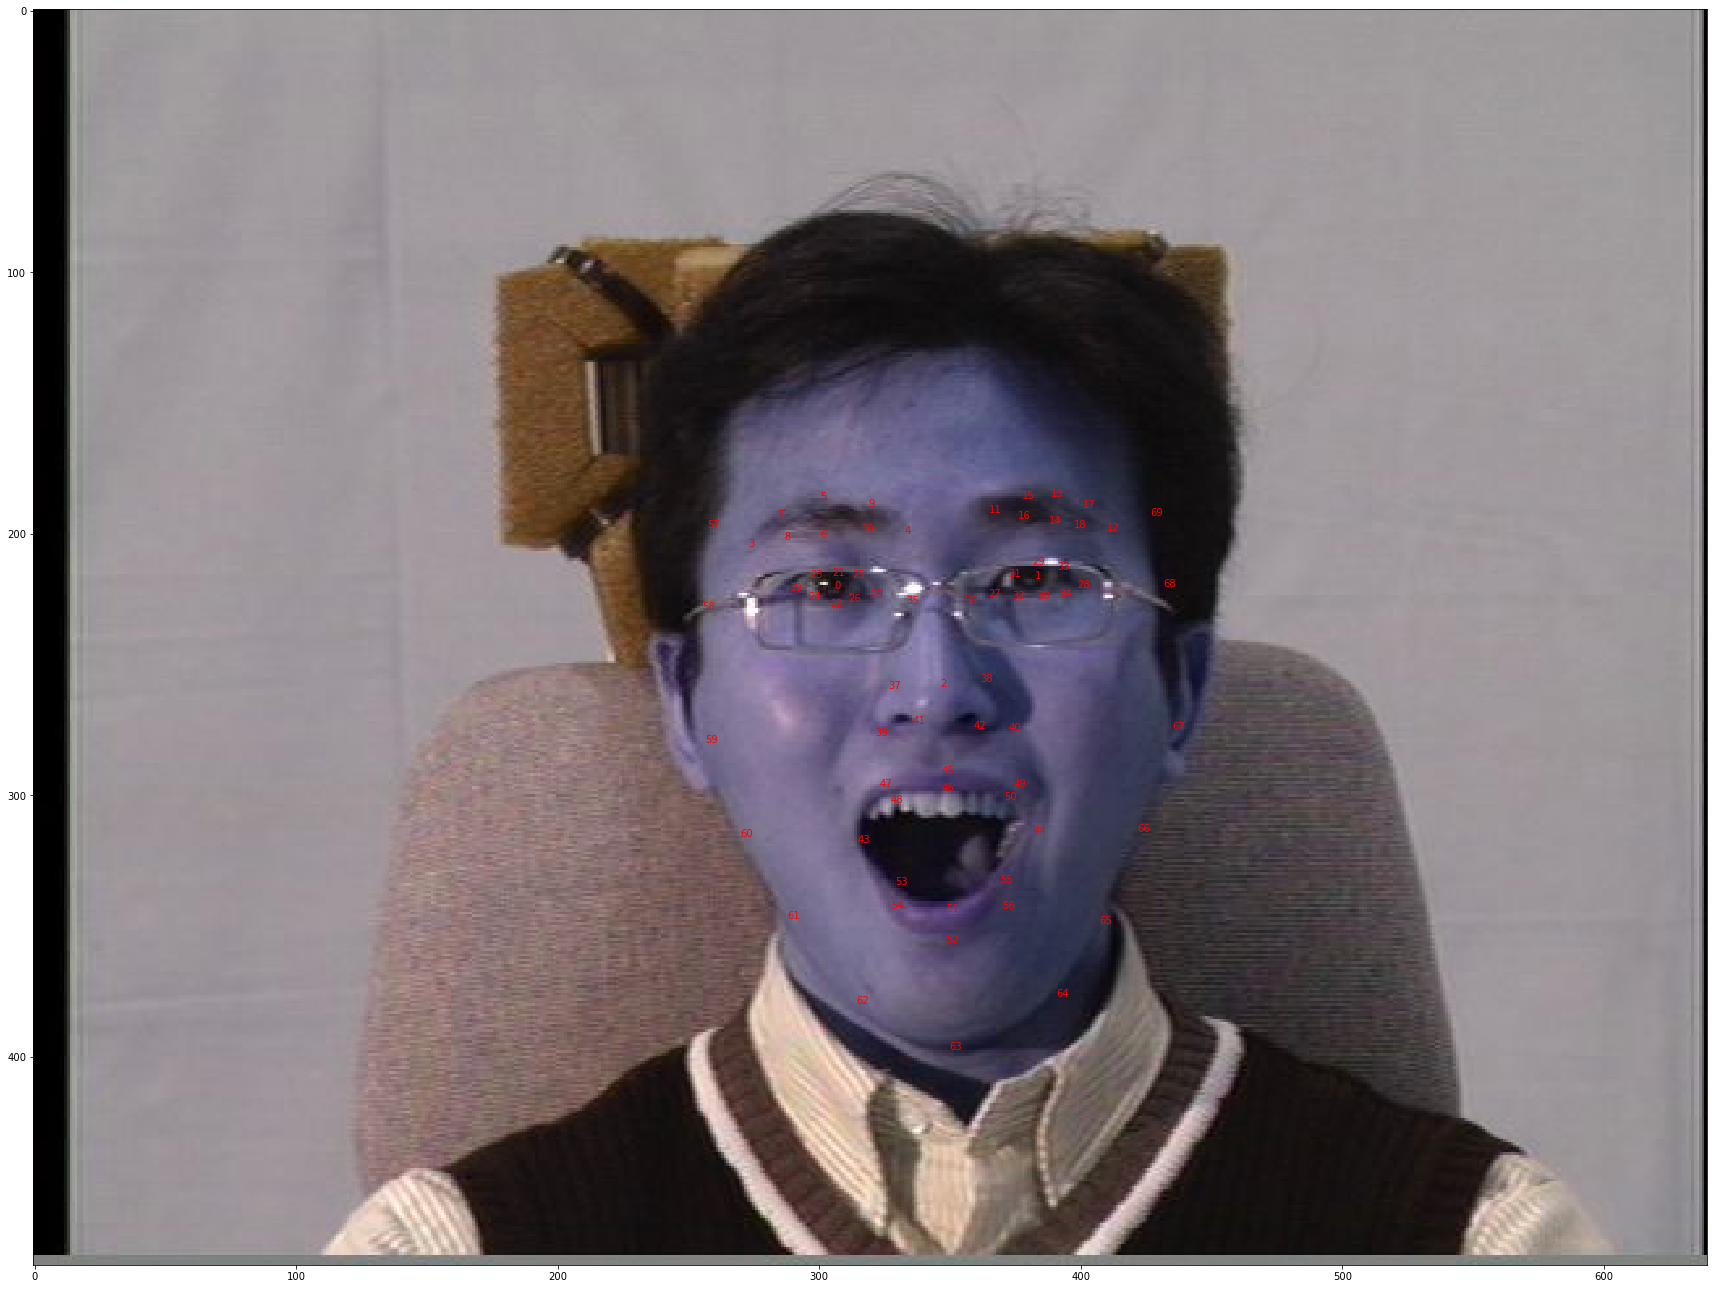

In [96]:
x, y = np.transpose(raw_landmark)

plt.figure(figsize=(30,30))
plt.imshow(img)
# plt.scatter(x, y)

for i in range(len(raw_landmark)):
    plt.annotate(i, (x[i], y[i]), c='r')

In [ ]:
img = dt['image']
landmarks_2d = dt['landmarks_2d']
landmarks_3d = dt['landmarks_3d']


minxy, maxxy = get_face_roi(landmarks_3d)
bbox = minxy[0], minxy[1], maxxy[0], maxxy[1]

encoded_img = tf.io.encode_jpeg(img, quality=100).numpy() 


In [23]:
dt

['305.904000 220.942000',
 '382.321000 216.986000',
 '346.045000 258.216000',
 '272.931000 204.914000',
 '332.532000 199.805000',
 '300.177000 187.033000',
 '300.177000 201.508000',
 '284.000000 193.845000',
 '286.554000 202.359000',
 '318.909000 189.588000',
 '316.355000 198.953000',
 '364.794000 191.744000',
 '409.960000 198.562000',
 '388.655000 185.779000',
 '387.803000 196.005000',
 '377.577000 186.631000',
 '375.872000 194.301000',
 '400.586000 190.040000',
 '397.177000 197.710000',
 '288.869000 221.794000',
 '319.532000 224.349000',
 '305.052000 215.832000',
 '304.200000 227.756000',
 '296.534000 216.684000',
 '295.683000 225.201000',
 '312.718000 216.684000',
 '311.014000 226.053000',
 '364.422000 223.805000',
 '398.516000 220.396000',
 '381.469000 211.872000',
 '383.174000 224.658000',
 '372.093000 216.134000',
 '373.798000 224.658000',
 '390.845000 213.577000',
 '391.697000 223.805000',
 '333.262000 226.684000',
 '355.419000 226.684000',
 '326.445000 259.068000',
 '361.385000